<a href="https://colab.research.google.com/github/eugenie-kim012/Daily-Log/blob/main/19_05_2025_Clustering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽 가이드 - 7.군집화
https://github.com/wikibook/pymlrev2/tree/main/7%EC%9E%A5

In [4]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris() #데이터 추출
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width']) #컬럼의 이름 정하기
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
from sklearn.cluster import KMeans

# irisDF 데이터에 대해 KMeans 클러스터링 객체 생성
kmeans = KMeans(
    n_clusters=3,       # 군집(cluster) 수는 3개 (Setosa, Versicolor, Virginica)
    init='k-means++',   # 중심점 초기화를 'k-means++' 방식으로 (더 나은 성능)
    max_iter=300,       # 최대 반복 횟수는 300회까지
    random_state=0      # 랜덤 시드 고정 (재현 가능한 결과를 위해)
)

# 모델 학습 (클러스터 중심점 찾기 및 데이터 군집화 수행)
kmeans.fit(irisDF)      # irisDF는 Pandas DataFrame 형태의 입력 데이터


KMeans(n_clusters=3, random_state=0)

In [8]:
print(kmeans.labels_) #각 데이터가 어느 군집에 속하는 지를 알려주고 있다

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [9]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [12]:
# 실제 품종 라벨(0: Setosa, 1: Versicolor, 2: Virginica)을 'target' 열로 추가
irisDF['target'] = iris.target

# KMeans가 예측한 클러스터 결과를 'cluster' 열로 추가
irisDF['cluster'] = kmeans.labels_

# 실제 품종(target)과 예측된 클러스터(cluster)별로 그룹을 나누고,
# 각 그룹에 해당하는 'sepal length (cm)'의 개수를 세어 분포를 확인
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()

# 그룹별 데이터 개수 출력 → KMeans가 얼마나 잘 분류했는지 확인 가능
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [14]:
from sklearn.decomposition import PCA  # PCA (주성분 분석) 모듈 임포트

# PCA 객체 생성 (주성분 2개로 차원 축소하겠다는 의미)
pca = PCA(n_components=2)
# iris 데이터에 대해 PCA 수행 후, 변환된 데이터를 얻음
pca_transformed = pca.fit_transform(iris.data)

# 첫 번째 주성분(PCA 1축)을 'pca_x'라는 열로 DataFrame에 추가
irisDF['pca_x'] = pca_transformed[:, 0]

# 두 번째 주성분(PCA 2축)을 'pca_y'라는 열로 DataFrame에 추가
irisDF['pca_y'] = pca_transformed[:, 1]

# 결과 확인: 각 데이터 포인트에 대해 실제 품종, 클러스터 번호, PCA 좌표가 포함됨
irisDF.head(3)


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


# visualisation

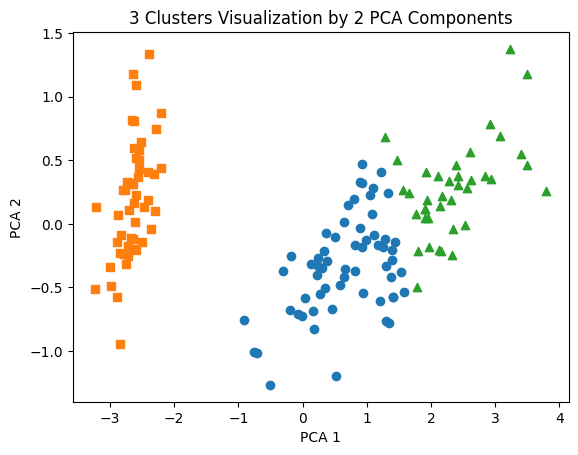

In [15]:
# 군집 값이 0, 1, 2인 경우마다 해당 데이터의 인덱스를 따로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index  # 클러스터 0에 속한 데이터의 인덱스
marker1_ind = irisDF[irisDF['cluster'] == 1].index  # 클러스터 1에 속한 데이터의 인덱스
marker2_ind = irisDF[irisDF['cluster'] == 2].index  # 클러스터 2에 속한 데이터의 인덱스

# 군집 값이 0, 1, 2인 경우마다 해당 데이터의 인덱스를 따로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index  # 클러스터 0에 속한 데이터의 인덱스
marker1_ind = irisDF[irisDF['cluster'] == 1].index  # 클러스터 1에 속한 데이터의 인덱스
marker2_ind = irisDF[irisDF['cluster'] == 2].index  # 클러스터 2에 속한 데이터의 인덱스

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## 군집화 알고리즘 테스트를 위한 데이터 생성

* 간단한 데이터 생성기 활용해보기
* make_blob() - 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있음
* make_classification() - 노이즈를 포함한 데이터를 만드는 데에 유용함

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Jupyter Notebook에서 그래프를 노트북 안에 출력
%matplotlib inline

# make_blobs를 사용해 클러스터링 연습용 2차원 데이터 생성
X, y = make_blobs(
    n_samples=200,        # 데이터 포인트 총 200개 생성
    n_features=2,         # 특성(차원)은 2개 → 2D 평면상의 점
    centers=3,            # 군집 중심(=클러스터 수)은 3개
    cluster_std=0.8,      # 군집 내 점들의 퍼짐 정도 (표준편차)
    random_state=0        # 재현 가능한 결과를 위해 랜덤 시드 고정
)

print(X.shape, y.shape)   # X는 (200, 2), y는 (200,) → X는 위치 좌표, y는 실제 군집 라벨

# y 배열(정답 레이블)의 고유값과 각 고유값의 개수 확인
unique, counts = np.unique(y, return_counts=True)
# 각 군집 라벨이 몇 개의 데이터로 구성되어 있는지 출력
print(unique, counts)


(200, 2) (200,)
[0 1 2] [67 67 66]


In [21]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


# make_blob() 알고리즘으로 군집화하기

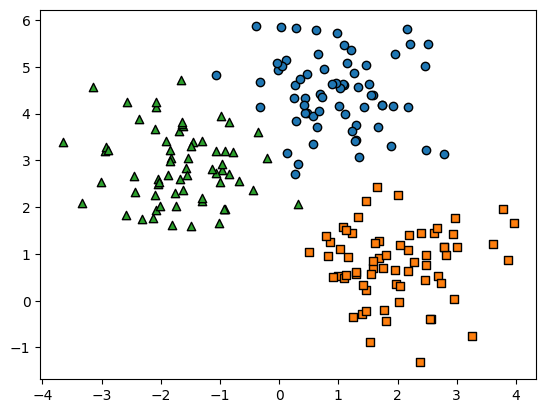

In [22]:
# 실제 타깃 레이블(y 값)을 기준으로 데이터 포인트들을 그룹별로 나누어
# 각 군집(0, 1, 2)을 서로 다른 마커 모양으로 시각화하는 산점도 그래프를 그립니다.
# 이를 통해 make_blobs로 생성한 데이터가 실제로 어떻게 분포되어 있는지 확인할 수 있습니다.
target_list = np.unique(y)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

plt.show()


# KMeans로 군집화하기

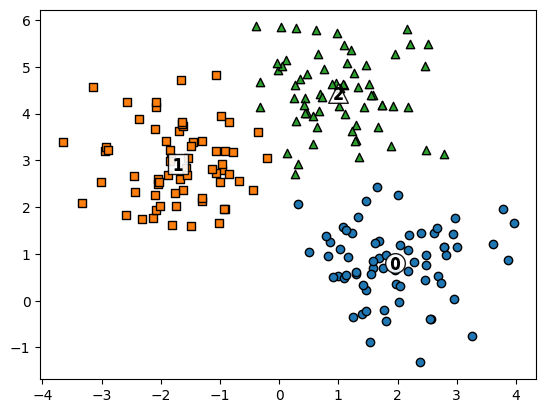

In [23]:
# KMeans 알고리즘을 사용해 X 데이터(2차원)를 3개의 군집으로 클러스터링한 뒤,
# 각 데이터 포인트를 클러스터 레이블(kmeans_label)에 따라 다른 마커로 시각화하고,
# 각 클러스터의 중심점(centroid)도 함께 표시하는 산점도 그래프를 출력합니다.
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 중심 좌표(centroid)를 하얀색 큰 마커로 표시 후,
    # 클러스터 번호를 겹쳐서 검은색 텍스트 마커로 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()


In [24]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


# cluster_std를 조정하면서 std가 작을 수록 데이터가 모여있고 클수록 퍼져 있는 것을 확인하기
* 결국, 군집화의 효율성을 비교할 수 있음

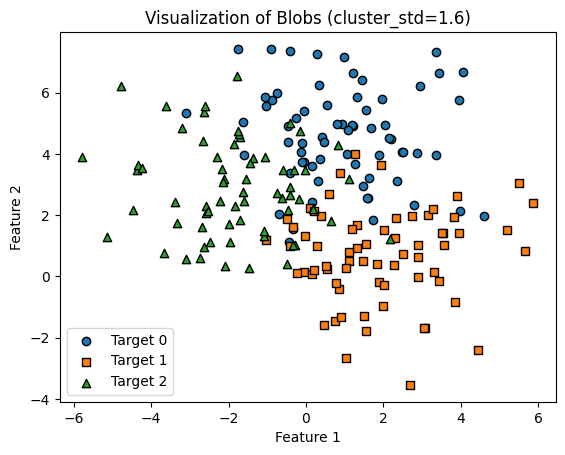

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 데이터 생성: 군집 간 간격이 좁고(표준편차 0.4), 2차원
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.6, random_state=0)

# 데이터프레임으로 변환 (시각화와 분석을 편하게 하기 위해)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 고유 타깃별로 시각화 (정답 라벨 기준)
markers = ['o', 's', '^']
target_list = np.unique(y)

for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(
        x=target_cluster['ftr1'],
        y=target_cluster['ftr2'],
        marker=markers[target],
        label=f'Target {target}',
        edgecolor='k'
    )

plt.title('Visualization of Blobs (cluster_std=1.6)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# 실루엣 분석 (silhouette analysis)
* 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 (다른 군집과의 거리는 떨ㄹ어져있고, 동일 군집끼리의 데이터는 잘 묶여 있다)
* 실루엣 계수(silhouette coefficient)을 기반으로 분석 - 해당 데이터가 같은 군집 내의 데이터와는 얼마나 가깝게 군집화되어 있고, 다른 데이터와는 얼마나 멀리 분리되어 있는지를 나타냄
* 좋은 군집화의 기준 - 실제 실루엣 계수의 평균값, 즉 사이킷런의 shilhoutte_score는 0~1 사이의 값을 가지며, 1에 가까울 수록 좋음
* 전체 실루엣 계수의 평균값과 더불어, 개별 군집의 평균값의 편차가 크지 않아야 한다

| 값 범위        | 해석                |
| ----------- | ----------------- |
| 0.7 \~ 1.0  | 매우 잘 클러스터링됨       |
| 0.5 \~ 0.7  | 꽤 잘 나뉨            |
| 0.25 \~ 0.5 | 그럭저럭 나뉨           |
| 0 \~ 0.25   | 군집이 애매함           |
| < 0         | 군집이 틀리게 배정됐을 수 있음 |




## 붓꽃 데이터 세트를 이용한 군집 평가

In [28]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가 # irisDF에 실루엣 계수값을 새로운 열로 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
# 전체 데이터에 대한 평균 실루엣 계수 계산
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


# 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

* 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐있는 경우에 K-평균의 적절한 군집 개수가 설정되었다고 판단

In [29]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# make_blobs를 통해 최적화 찾기 (visualisation)

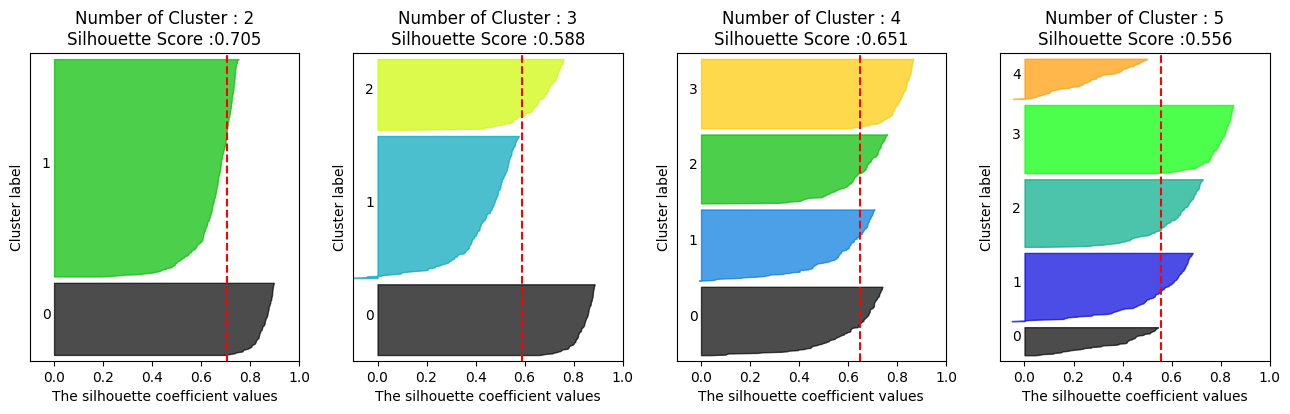

In [30]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([ 2, 3, 4, 5], X)

# k 평균을 통해 최적화 찾기 (visualisation) - 2개

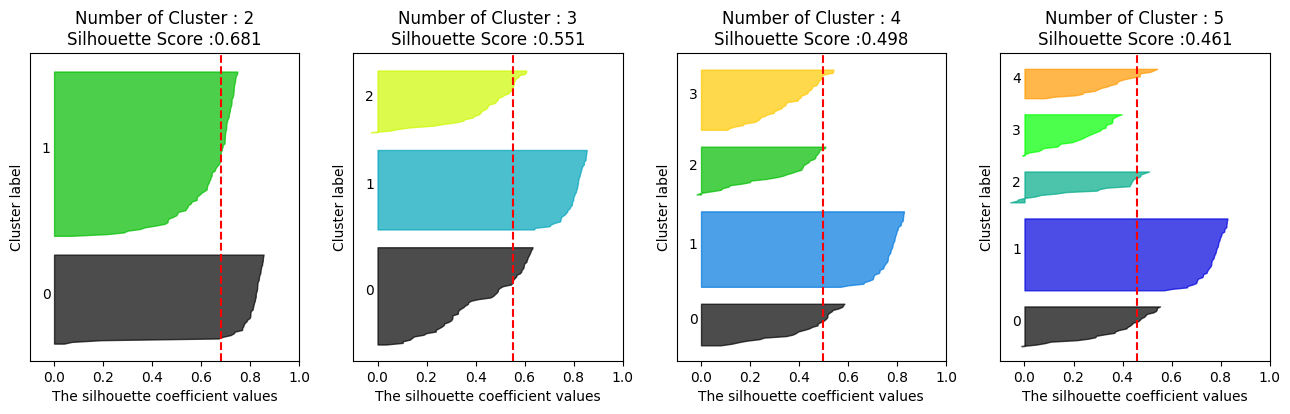

In [31]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

# 평균 이동 (Mean Shift)
* 역시 군집을 중심으로 지속적으로 움직이면서 군집화 수행, but k-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 반면 평균 이동은 데아터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴
* 데이터의 분표도를 이용하여 군집 중심도를 참음
- 확률 밀도 함수 (probability density function)
- KDE (Kernal Density Estimation) : 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
* h: 평활화 (smoothing), 적합한 KDE의 대역을 찾는 것은 KDE 기반의 평균 이동 군집화에서 매우 중요 (매우 큰값은 과도하게 평활화를 가져옴, 작은 경우 과적합 - 변동성이 큰 방법으로 확률 밀도 함수를 추정하기 때문)
* 대역폭이 클수록 평활화된 KDE로 인한 적은 수의 군집 중심성을 가지고 대역폭이 적을수록 많은 수의 군집 중심점을 가짐
* 사이킷런 - 최적의 대역폭 계산을 위해 estimate_bandwidth()함수를 제공

In [32]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [33]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [34]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [35]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


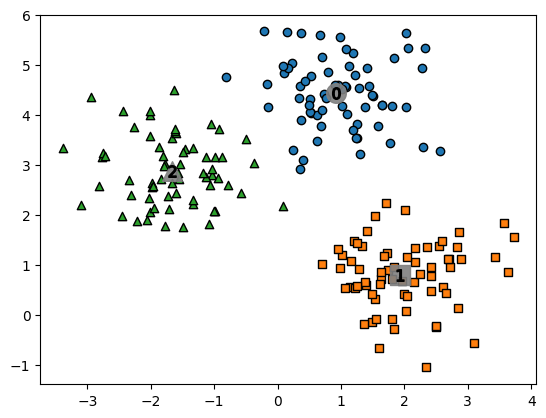

In [36]:
# 이 코드는 MeanShift 알고리즘으로 군집화한 결과를 시각화합니다.
# 먼저 clusterDF에 MeanShift 결과 레이블(meanshift_label)을 추가하고,
# 군집 중심 좌표(centers)를 불러옵니다.
# 군집 레이블(unique_labels)을 기준으로 반복하면서:
# - 각 레이블에 속한 데이터 포인트를 다른 마커 모양으로 구분해 scatter plot으로 시각화하고
# - 해당 군집의 중심점(centroid)은 회색 큰 점으로 그리고,
# - 중심 위치에 클러스터 번호를 텍스트로 표시하여 구분이 가능하게 합니다.
# 이 그래프를 통해 MeanShift가 자동으로 찾은 군집의 분포와 중심 위치를 시각적으로 확인할 수 있습니다.

import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels               # MeanShift 결과 레이블 추가
centers = meanshift.cluster_centers_                         # MeanShift 중심 좌표
unique_labels = np.unique(cluster_labels)                    # 군집 라벨 목록
markers = ['o', 's', '^', 'x', '*']                          # 마커 종류

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]

    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
                edgecolor='k', marker=markers[label])        # 데이터 포인트

    plt.scatter(x=center_x_y[0], y=center_x_y[1],
                s=200, color='gray', alpha=0.9, marker=markers[label])  # 클러스터 중심(회색)

    plt.scatter(x=center_x_y[0], y=center_x_y[1],
                s=70, color='k', edgecolor='k', marker='$%d$' % label)  # 클러스터 번호 (검은 텍스트 마커)

plt.show()


In [37]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())


target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


# GMM (Gaussian Mixture model)
* 군집화를 적용하고자 하는 데이터가 여러개의 가웅시안 분포를 가진 데이터의 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행
* 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러개의 확률 분포 곡선, 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식
* 모수 추정의 경우 대표적으로 (개별 정규 분포의 평균과 분산, 각 데이터가 어떤 정규 분표에 해당하는지의 확룰)을 추정

## GMM를 이용한 붓꽃 데이터 세트 군집화
* https://github.com/wikibook/pymlrev2/blob/main/7%EC%9E%A5/7-4_Gaussian_Mixture_Model.ipynb

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [2]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


## GMM과 K-평균의 비교
* K-mean은 보통 원형의 범위에서 군집화를 수행/ 길죽한 타원의 형태에서는 잘 수행하지 못함

In [4]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

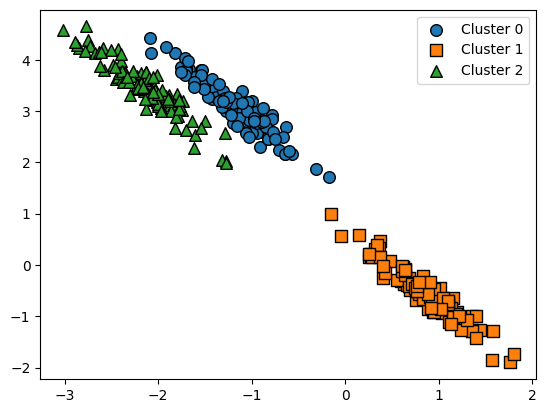

In [5]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함.
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

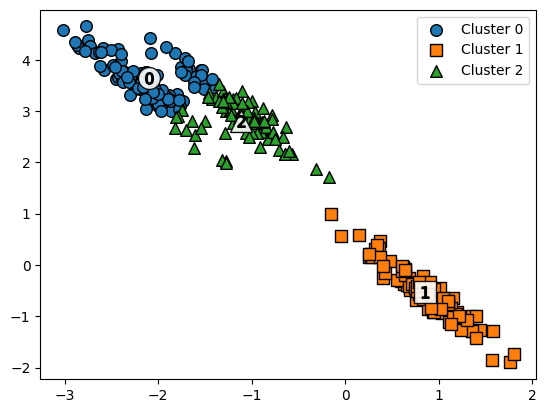

In [6]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

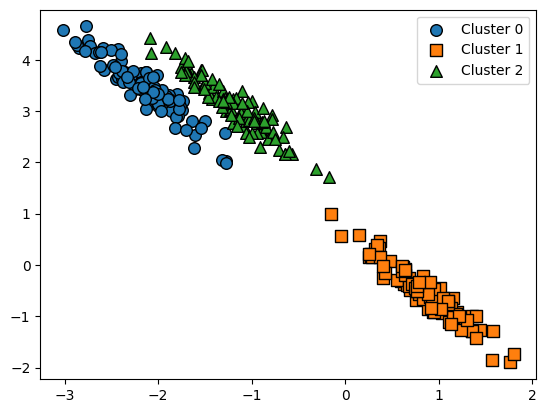

In [7]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

In [8]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64
